# Héctor Delgado Díaz and Samantha Gilbert

## Exoplanets HW 2

## Spring 2020

### Problem 1

In this problem, we want to write a function to find the overlapping area of two circles as a function of their separation $b$ and radius ratio $k = R_p/R_\star$. When the planet is entirely enclosed by the star, the flux merely changes by the square of this ratio $k^2$. However, ingress and egress are more complicated. During the very beginning and the very end of the transit, we will have to solve the geometric problem of finding the overlapping areas of the planet and the star according to the figure below. In this figure, we have actually normalized the distances by the stellar radius $R_\star$ such that $R_\star$ = 1.

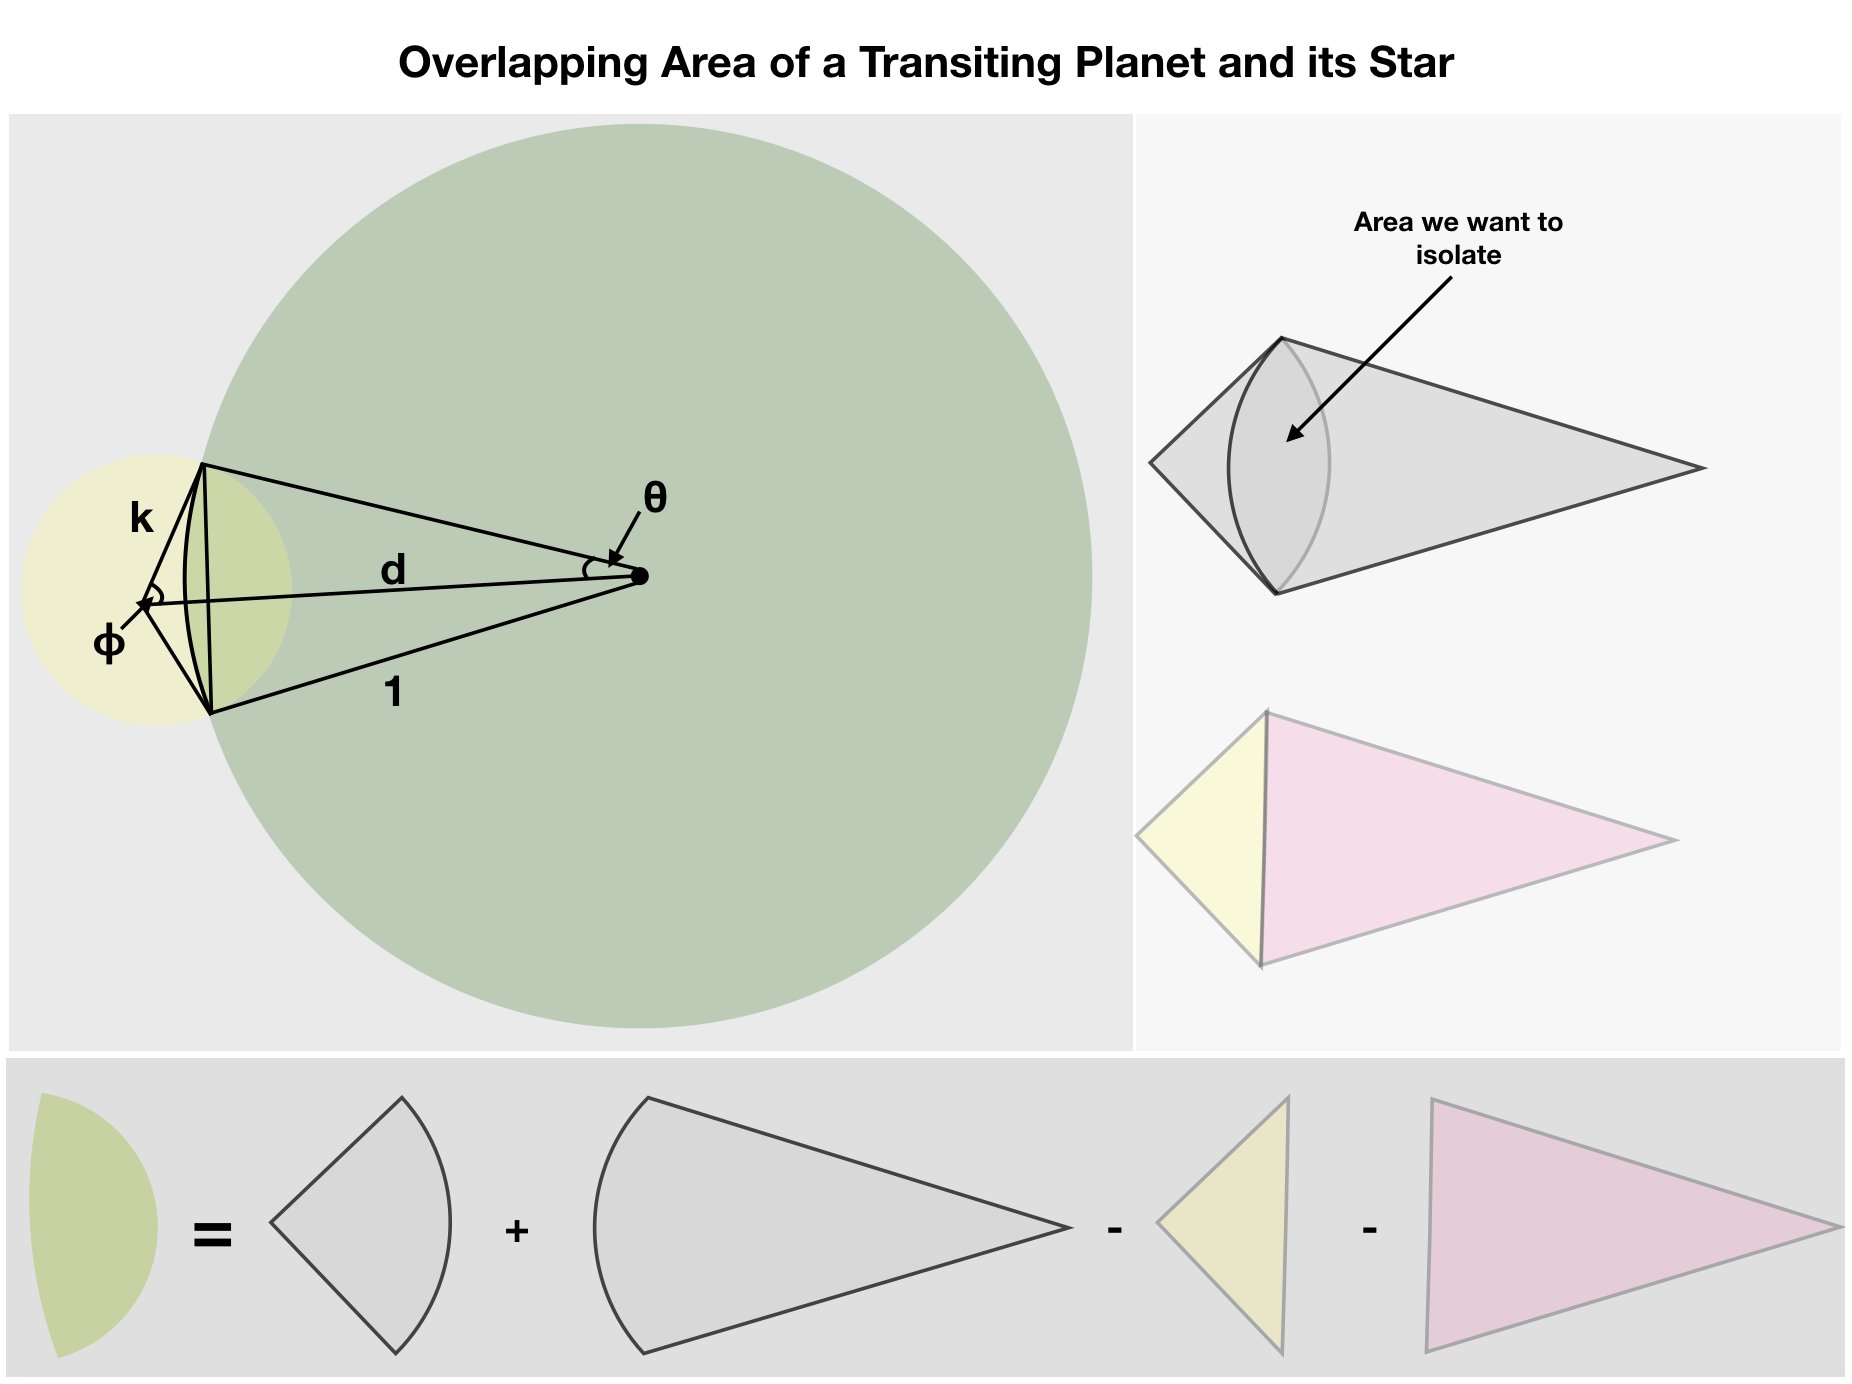

To find the overlapping area, we must add the two area sectors and subtract the two triangle areas to give

$$A_\textrm{overlap} = A_1 + A_2 - A_3 - A_4 $$

The area of the first and second chunks, the planet and star sectors, respectively, is given by the typical sector area formula:

$$A_{\textrm{1,2}} = \frac{1}{2}{\Phi}\pi r^2  $$

However, since we are normalizing by the stellar radius $R_\star$, we will have

$$A_{\textrm{1,2}} = {\Phi} \left(\frac{r}{R_\star}\right)^2  $$

With sector angles given by $2\theta$ and $2\phi$, we find

$$A_1 = k^2\phi  $$

and

$$A_2 = \theta $$

The area of the triangle chunks is given by the typical triangle area formulas, where we will have to be clever about how we define the sides and angles to properly assign our free parameters. The law of cosines will be particularly useful in relating the separation $d$ to the angles $\theta$ and $\phi$.

The law of cosines gives

$$k^2 = d^2 + 1^2 - 2d\cos(\theta) $$

$$1^2 = d^2 + k^2 - 2dk\cos(\phi) $$

Solving for $\theta$ and $\phi$ respectively, we find

$$\theta = \cos^{-1}\left(\frac{d^2 + 1 - k^2}{2d}\right) = \cos^{-1}(u)$$

$$\phi = \cos^{-1}\left(\frac{d^2 + k^2 - 1}{2dk}\right) = \cos^{-1}(v)$$

where we have now re-defined $\theta$ and $\phi$ in terms of the free parameters $u$ and $v$.The typical triangle area formula $A = \frac{1}{2}b\times h$ gives

$$A_3 = 2\times\frac{1}{2}\sin(\theta)\cos(\theta) $$

Subbing in our new free parameters gives 

$$A_3 = \sin(\cos^{-1}(v))\cos(\cos^{-1}(v)) = k^2v\sqrt{1-v^2}$$


Similarly, we find for the fourth area chunk

$$A_4 =  2\times\frac{1}{2}k^2\sin(\phi)\cos(\phi)$$ 

$$A_4 = \sin(\cos^{-1}(u))\cos(\cos^{-1}(u)) = u\sqrt{1 - u^2}$$

We can also rewrite our formulae for $A_1$ and $A_2$ in terms of the free parameters $u$ and $v$. Finally, we have a formula for determining the overlapping area of the planet and star as a function of the radius ratio $k$ and the separation $d$ $\textit{during ingress and egress}$:

$$A_{\textrm{overlap}} =  k^2\cos^{-1}(v) + \cos^{-1}(u) - k^2v\sqrt{1-v^2} - u\sqrt{1 - u^2}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def overlapping_area(d, k):
    u = (d**2 + 1 - k**2) / (2*d)
    v = (d**2 + k**2 - 1) / (2*d*k)
    
    A_1 = k**2 * np.arccos(v)
    A_2 = np.arccos(u)
    A_3 = k**2 * v * np.sqrt(1- v**2)
    A_4 = u * np.sqrt(1 - u**2)
    
    return A_1 + A_2 - A_3 - A_4

### Problem 2

We now wish to apply the overlapping area function we devised in problem 1 in order to write a function for measuring the secondary eclipse in the transit light curve. We accomplish this by calculating the "dip" in flux due to the planet's transit. We apply three distinct cases: when the planet is wholly outside the star, when the planet is wholly inside it, and when the planet is crossing the star during ingress and egress. In the first case, the flux of the star should not be dimmed at all. In the second case, the flux should be dimmed by the area of the planet. Finally, in the third case, the flux should be dimmed according to our overlapping area equation. In order to apply these cases as a piecewise function, we must write functions to solve for the true longitude angle as a function of time as well as the sky separation.

In [3]:
def true_longitude(t, t_0, P):
    return 2 * np.pi / (P * (t - t_0))

def separation(theta, a, i):
    d = a * np.sqrt( (np.cos(theta))**2 + (np.cos(i))**2 * (np.sin(theta))**2 )
    return d

In [6]:
def reduced_flux(t_arr, k, a, i, t_0, P, F_0=1):
    
    model_flux = []
    
    for t in t_arr:
        theta = true_longitude(t, t_0, P)
        d = separation(theta, a, i)
        
        if 0 < theta < np.pi: # Ignore dips in the flux due to the planet moving behind the star
            if (d > 1 + k):
                F = F_0
                model_flux.append(F)
            elif (d >= 1 - k) & (d <= 1 + k):
                F = F_0*(1 - overlapping_area(d, k) / np.pi) # Normalize the area by dividing by pi
                model_flux.append(F)
            elif (d < 1 - k):
                F = F_0*(1 - k**2)
                model_flux.append(F)
            
        else:
            model_flux.append(F_0)
    
    return np.array(model_flux)

We test our function to make sure it produces a morphologically reasonable transit light curve.

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in cos
  """
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sin
  """
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


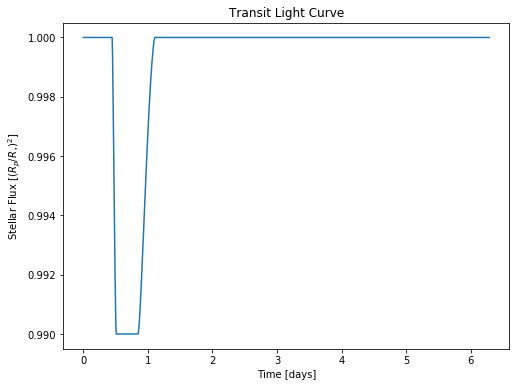

In [9]:
k, a, i, t_0, P = .1, 1.5, np.pi/3, 0, 2*np.pi
t_arr = np.linspace(0, P, 1e3)

model_flux = reduced_flux(t_arr, k, a, i, t_0, P, F_0=1)

fig1 = plt.figure(figsize=[8,6])
plt.plot(t_arr, model_flux)
ax1 = plt.axes()
ax1.set_xlabel('Time [days]')
ax1.set_ylabel('Stellar Flux [$(R_p/R_{\star})^2$]')
plt.title('Transit Light Curve')
plt.show()

### Problem 3

Now that we have written functions to calculate the reduced stellar flux due to the transiting planet, we can start working with the mystery planet data. We will determine the period of the transit by finding the period that minimizes the scatter between adjacent points. We will then use this period to fold the data, and perform a fit to find the free parameter values that minimize the chi-squared value.

In [37]:
# First, extract the data from 'mystery_planet02.txt' where the columns are time, RV and RV error

#path = '/Users/samanthagilbert/Desktop/'
#path = '/Users/hector/Desktop/ASTR597SP20/astr597_exo/'
path = ''

file_name = 'mystery_planet02.txt'

data = pd.read_csv(path+file_name, delim_whitespace=True, header=None)

time = data[0]
fl = data[1]
fl_err = data[2]

data.columns = ['time','flux','flux_err']

In [12]:
def calc_phase(time, P):
    phase = (time % P)
    #print(phase)
    return phase

We now want a function that calculates the scatter of the flux values based on the period. We define scatter at each period to be the difference in neighboring flux data squared such that

$$\sigma = \sum_{i=1}^{N-1}(F_i - F_{i+1})^2 $$
The best fit period will minimize the scatter.

In [13]:
def calc_scatter(flux_sort): # The flux is sorted in terms of the phase
    N = flux_sort.shape[0]
    scatter = 0
    for i in range(N - 1):
        scatter += (flux_sort[i] - flux_sort[i + 1])**2
    return scatter

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


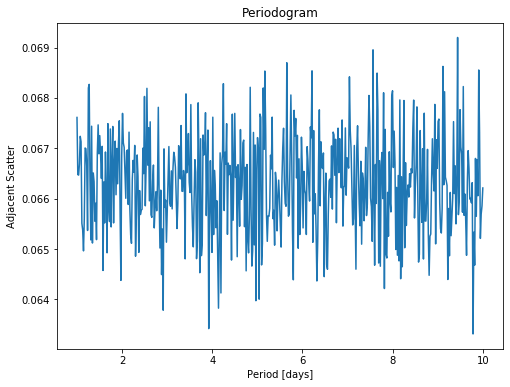

In [39]:
# After playing with the coarseness of the grid, we find that the best fit period 
# should lie between 1 and 10 days.

scatters = []
for p in np.linspace(1, 10, 500):
    data['{:3f}'.format(p)] = calc_phase(data.time, p)
    scatters.append(calc_scatter(data.sort_values('{:3f}'.format(p)).flux.values))

plt.figure(figsize=[8,6])
plt.plot(np.linspace(1, 10, 500),scatters)
ax = plt.axes()
ax.set_title('Periodogram')
ax.set_xlabel('Period [days]')
ax.set_ylabel('Adjacent Scatter')
plt.show()

In [40]:
best_p = np.linspace(1, 10, 500)[np.argmin(scatters)]
print(best_p)

9.783567134268537


We find that the period that minimizes the scatter is P = 9.783567134268537 days. Using this period to re-sort our flux and folded time data, we can produce a new periodogram.

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


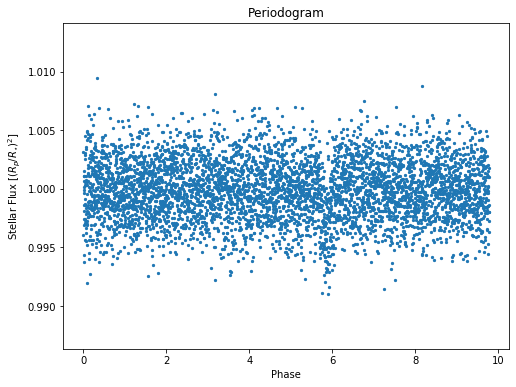

In [36]:
data['{:3f}'.format(best_p)] = calc_phase(data.time, best_p)
flux_periodogram = data.sort_values('{:3f}'.format(best_p)).flux.values
folded_time = data.sort_values('{:3f}'.format(best_p))['{:3f}'.format(best_p)]
flux_err_folded = data['flux_err'].iloc[folded_time.index]

plt.figure(figsize=[8,6])
plt.scatter(folded_time,flux_periodogram, s=5)
ax = plt.axes()
ax.set_title('Periodogram')
ax.set_xlabel('Phase')
ax.set_ylabel('Stellar Flux [$(R_p/R_{\star})^2$]')
plt.show()

In [ ]:
def chi_squared(fl, flerr, calc_fl):
    return np.sum((fl - calc_fl)**2 / flerr**2)

In [ ]:
def solve_hcv(time_data, fl_data, fl_err, P, tarr, t0, K, I, A):
    
    predicted_fl = reduced_flux(tarr, K, A, I, t0, P, F_0=1)
    
    return chi_squared(fl_data, fl_err, predicted_fl)

In [ ]:
def obj_func(P, tarr, t0, K, I, A):

    time_data = folded_time.values
    fl_data = flux_periodogram
    fl_err = flux_err_folded.values
    chi_sq = solve_hcv(time_data, fl_data, fl_err, P, tarr, t0, K, I, A)
    
    return chi_sq

In [ ]:
# Define a chi square fit upper bound as 1e14.
# Create an (e, tp) space to iterate and find the minimum chi_square
# to fit the data.

#best_tarr = None
best_t0 = None
best_k = None
best_i = None
best_a = None
best_fit = 1e14

#potential_tarr = np.linspace(0, best_p, 200)

t_arr = np.linspace(0, best_p, 5000)
potential_t0 = np.linspace(folded_time.min(), folded_time.max(), 200)
potential_k = np.linspace(0, 1, 200)
potential_i = np.linspace(0, np.pi/2, 200)
potential_a = np.linspace(0,5, 200)

#for t in potential_tarr:
for n in potential_t0:
    for k in potential_k:
        for i in potential_i:
            for a in potential_a:
                chi_sq = obj_func(best_p, t_arr, n, k, i, a)
                if chi_sq < best_fit:
                    #best_tarr = t
                    best_t0 = n
                    best_k = k
                    best_i = i
                    best_a = a
                    best_fit = chi_sq

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in cos
  """
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sin
  """


In [ ]:
def calc_depth(k):
    return best_k ** 2

def calc_b(a, i):
    return a * np.cos(i)

In [ ]:
depth = calc_depth(best_k)
b = calc_b(best_a, best_i)

In [ ]:
# Finally, plot the fit of our model with the mystery planet data.

plt.figure(figsize=[8,6])
plt.plot(folded_time, reduced_flux(t_arr, best_k, best_a, best_i, best_t0, best_p, F_0=1), label='best fit')
plt.scatter(folded_time,flux_periodogram,label='mystery planet')
plt.title("Best Fit for the Flux Data")
#plt.xlabel('Folded time')
#plt.ylabel('Radial velocity [km/s]')
plt.legend()
plt.show()